<br><br>
<h1 style="font-family:'Verdana',sans-serif; color:#1D7874; font-size:30px;">Transmission system operation</h1>
<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    This notebook will only cover the minimum required to start using grid2op. For a more detailed documentation about this package, we invite you to consult the "getting_started" notebooks we developped that go deeper into this framework. They are avaible at <a href="https://github.com/rte-france/Grid2Op/tree/master/getting_started"> https://github.com/rte-france/Grid2Op/tree/master/getting_started </a> (if you download grid2op) and can be run interactively (without any install) in a browser thanks to mybinder at this link :
    <a href="https://mybinder.org/v2/gh/rte-france/Grid2Op/master"><img src="utils/img/badge_logo.svg"></a>
    
A quite exhausitve documentation of grid2op is also available at <a href="https://grid2op.readthedocs.io/en/latest/">https://grid2op.readthedocs.io/en/latest/</a>
</p>

<br>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">Table of Contents</h3>
<br>
<ol style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    <li ><a href="#powsys">Generic Information about power system</a>
    <ol style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:12px;">
        <li><a href='#introduction'>Introduction</a></li>
        <li><a href='#motivation'>Motivation</a></li>
        <li><a href='#loading_env'>Load an environment with grid2op</a></li>
        <li><a href='#grid_info'>Grid information</a></li>
        <li><a href='#simple_grid'>Example on a simple grid</a></li>
        <li><a href='#line_disconnection'>A line disconnection and its effect</a></li>
        <li><a href='#sub_change'>Changing the topology: reconfiguring a substation</a></li>
        <li><a href='#conclusion'>Conclusion</a></li>
    </ol>
     </li>
</ol>

<a class="anchor" id="powsys"></a>
<h2 style="font-family:'Verdana',sans-serif; color:#1D7874;" id="powsys">1. Generic Information about power system</h2>

This notebook present some generic information about power system operations and planning and 
<a class="anchor" id="introduction"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">A. Introduction</h3>
<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    This notebook is an introduction to power system operations and the grid2op pacakge. Operating electrical power grids has been studied for many years around the world and involves many activities. Power grids, especially transmission grids, aim to transport electricity over long distances from power plants to consumers. To be efficient and minimize energy losses, power grids often operate under high voltages (above 20kV). One of the main goals for power grid operators is to ensure a **reliable and secure** continuity of delivery of electricity to consumers under some additional quality criterions that can vary from one country to another.      
<br><br>
    For simplicity, we show here a small grid made of four substations as well as producers, consumers and powerlines connected to them. However, transmission grids are usually much more complex and involve many long lines that connect different cities or states. A grid often connects an entire country linking hundreds of power plants and distribution networks but our current example should illustrate clearly enough how congestion could arise on the power grid and which operations could help manage it. Congestion management is actually the most critical and time-consuming task for a power grid operator.
<br><br>
    <img src="utils/img/Example-Grid.jpg", width=650, ALIGN="middle", border=20>
<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:center; font-size:11px;">
(courtesy by Marvin Lerousseau -- if images does not display correctly, make sure to start the jupyter notebook server from the root directory of the starting kit.)
</p>
</p>
<br><br> 
For more information on the grid2op platform, some explanatory notebooks are available in the `getting_started` directory of the package located at <a href="https://github.com/rte-france/Grid2Op">https://github.com/rte-france/Grid2Op</a>. If these notebooks still do not answer your question, a technical documentation of most of the platform is available online at <a href="https://grid2op.readthedocs.io/">https://grid2op.readthedocs.io/</a>. 

<a class="anchor" id="motivation"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">B. Motivation</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    A powerline has some physical capacity as illustrated in the figures below. This is the thermal limit of the powerline.
    Here is a description of the different cases that can happen :
        <img src="utils/img/Powerline_ok.png", width=650, ALIGN="middle", border=20> <b>Best situation :</b> Only a little electricity is flowing through this powerline. It is far from the tree below it, thus presenting very little risk.
    <img src="utils/img/Powerline_tense.png", width=650, ALIGN="middle", border=20> <b>Situation at risk :</b> More current flows through the powerline. Due to <a href="https://en.wikipedia.org/wiki/Joule_heating">Joule heating</a>, it gets hotter and closer to the tree below it. Typically, powergrids operators want to be alerted when such a situation becomes critical.
    <img src="utils/img/Powerline_ko.png", width=650, ALIGN="middle", border=20> <b>Too late to act</b> Even more current flows through the powerline. Due to Joule heating, it gets even hotter and ends up in contact with the tree. At this point nothing can be done. The tree can catch fire (due to heat), the powerline can break, etc. This situation should be anticipated and avoided.
    <br><br>
    To prevent this potentially dramatic effect, powerlines are often equiped with "sensors" that detect when the flow exceeds a certain threshold (called "<b>thermal limit</b>"), typically in the second figure above. Then, if the flow remains above this thermal limit for a given amount of time, then the powerline is <b>automatically</b> disconnected form the powergrid without any human intervention to ensure that the last situation exposed previously does not occur. To prevent the disconnection of more and more powerlines (phenomenon called "cascading failure") operators often prefer to act <i>before</i> the powerline is disconnected and try to re-route the flow to other powerlines.
<br><br>
    To be as efficient as possible, operators monitor the grid in real time. Knowing the power flowing through all the powerlines of the grid, they can anticipate problems by relying on their expertise and making extensive simulations that require a "powerflow solver". That "powerflow solver" is able to compute how much power flows in each powerline given the location of productions and consumptions in the grid as well as the topology of the powergrid.
<br><br>
    As a first intuition, power flows increase when the electrical consumption increases. More specifically, the flows in the powerlines are affected by the dynamics of power consumption and the availability of power plants or productions. It often varies along the course of the day, as consumer behaviors change depending on the hour of the day. There are usually more activities in the middle of the day, while lighting is used mostly in the evening. During the night, the electrical consumption is mostly due to electrical heating systems as well as some industries.   
<br><br>  
    A congestion could be caused by day-to-day demand, but could also be due to some external factors such as changes to the topology of the grid, made by the operator. It could also be caused by lines that are in maintenance or previous faults that led to cascading failures or put the system in unstable conditions.
</p>

<a class="anchor" id="loading_env"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">C. Loading the environment</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    Grid2Op is an open-source platform that relies on powerflow solvers (typically pandapower) to compute the power flows in a grid. The main focus of this package is to be able to interact with the powergrid and to adopt a  <i>Reinforcement Learning</i> approach.
<br><br>
    Right now, we are going to load all required libraries and a grid2op environment. The environment contains all essential information about the power grid such as the substations where the loads, generators and transmission lines are connected, the power flows, and so on.
</p>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from grid2op.PlotGrid import PlotMatplot

In [2]:
import grid2op
from grid2op.Reward import L2RPNReward

# from l2rpn_baselines.utils import TrainingParam
# from l2rpn_baselines.DuelQLeapNet import train 
# from l2rpn_baselines.DuelQLeapNet.LeapNet_NNParam import LeapNet_NNParam
from l2rpn_baselines.utils import TrainingParam


import grid2op
from lightsim2grid.LightSimBackend import LightSimBackend

import pathlib

from grid2op.Reward import L2RPNSandBoxScore, L2RPNReward
from l2rpn_baselines.DuelQLeapNet import evaluate

%load_ext autoreload
%autoreload 2

In [3]:
# import os
# from grid2op.Reward import L2RPNSandBoxScore, L2RPNReward
# import grid2op
# from lightsim2grid.LightSimBackend import LightSimBackend
# from grid2op import make
# define the environment
# env = grid2op.make("l2rpn_case14_sandbox",
#                    reward_class=L2RPNReward)
backend = LightSimBackend()
env = grid2op.make("l2rpn_neurips_2020_track1_small", backend=backend,
                   reward_class=L2RPNReward )  # , test=True

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    An environment (powergrid) has been loaded. It is made of 5 substations, 8 powerlines, 3 loads and 2 generators. It is displayed in the next cell.
    <br><br>
    Though perfectly adapted for smaller grids, this kind of representation is not advised when dealing with powergrids with more than 10-15 substations.
</p>

**NB** This is not the powergrid of the competition. To load the powergrid of the competition you can do:


```python
env = make("l2rpn_case14_sandbox")
```

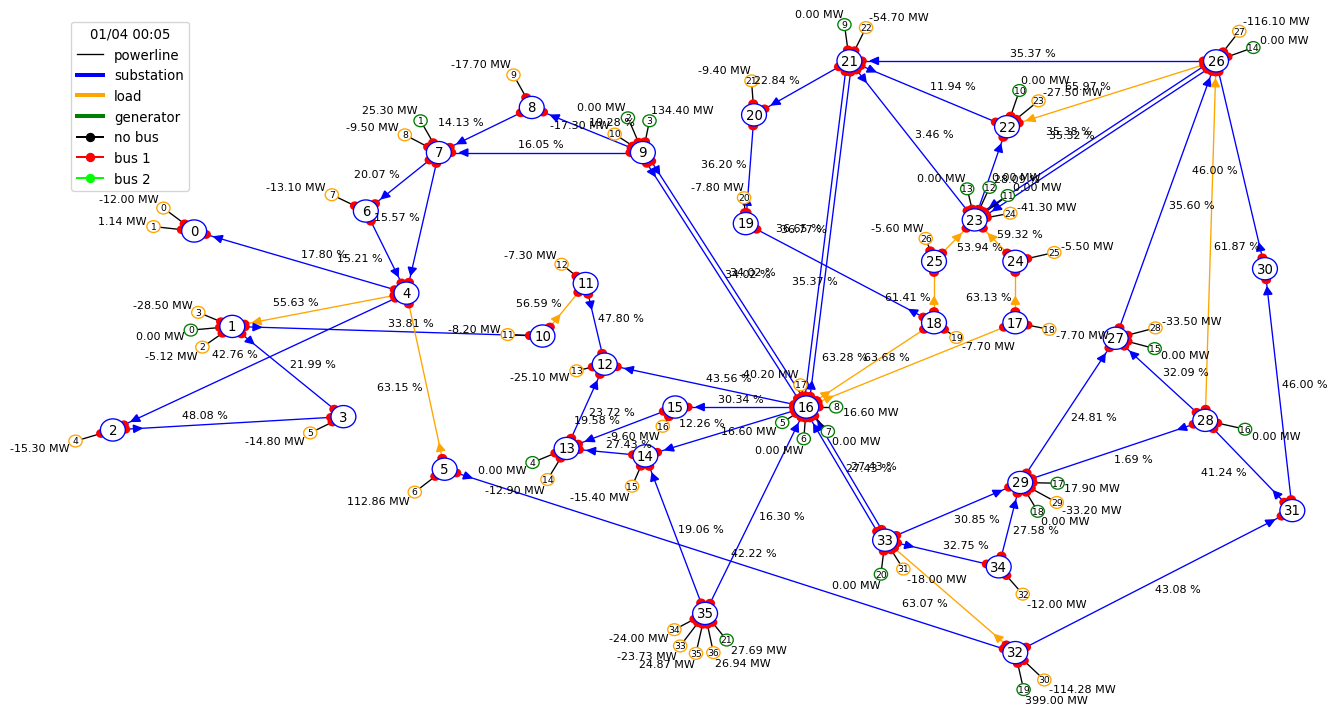

In [7]:
plot_helper = PlotMatplot(env.observation_space)

obs = env.reset()
fig = plot_helper.plot_obs(obs)

<a class="anchor" id="grid_info"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">D. Grid information</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
Even though the grid is very small and simple, it is a good way to understand the basics of grid2op. Let's gather some information about the most important objects in the power grid: power lines, electrical buses, loads (consumptions) and generators (productions). 
<br><br>
    The states of those objects are a part of the observation that the agent receives from the environment, and they are very important in the reinforcement learning process since they will be used by the agent to choose an action to perform. It means that from the switch status, power flows, etc, the agent should be able to take a decision (action) to best prevent the lines from disconnecting. The following lines of code retrieve the nodes or substations and the numbers of elements connected to each of them. 
</p>

In [8]:
# Load ids
print("\nInjection information:")
load_to_subid = env.action_space.load_to_subid
print ('There are {} loads connected to substations with id: {}'.format(len(load_to_subid), load_to_subid))

# Generators irds
gen_to_subid = env.action_space.gen_to_subid
print ('There are {} generators, connected to substations with id: {}'.format(len(gen_to_subid), gen_to_subid))

# Line id sender
print("\nPowerline information:")
line_or_to_subid = env.action_space.line_or_to_subid
line_ex_to_subid = env.action_space.line_ex_to_subid
print ('There are {} transmissions lines on this grid. They connect:'.format(len(line_or_to_subid)))
for line_id, (ori, ext) in enumerate(zip(line_or_to_subid, line_ex_to_subid)):
    print("Line with id {} coonects: substation origin id {} to substation extremity id {}".format(line_id, ori, ext))

# Num of elements per SE
print("\nSubstations information:")
for i, nb_el in enumerate(env.action_space.sub_info):
    print("On susbtation {} there are {} elements.".format(i, nb_el))


Injection information:
There are 37 loads connected to substations with id: [ 0  0  1  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 29 32 33 34 35 35 35 35]
There are 22 generators, connected to substations with id: [ 1  7  9  9 13 16 16 16 16 21 22 23 23 23 26 27 28 29 29 32 33 35]

Powerline information:
There are 59 transmissions lines on this grid. They connect:
Line with id 0 coonects: substation origin id 2 to substation extremity id 3
Line with id 1 coonects: substation origin id 2 to substation extremity id 4
Line with id 2 coonects: substation origin id 0 to substation extremity id 4
Line with id 3 coonects: substation origin id 1 to substation extremity id 3
Line with id 4 coonects: substation origin id 1 to substation extremity id 4
Line with id 5 coonects: substation origin id 4 to substation extremity id 6
Line with id 6 coonects: substation origin id 4 to substation extremity id 7
Line with id 7 coonects: substation origin id 6 to substat

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
The grid2op package allows to perform actions on the powergrid. However, the powergrid will not only be modified by the agent but also by the environment (load can increase because lots of people are getting home and start heating their appartment, for example).
    <br><br>
    In the L2RPN competition, you are asked to adapt the powergrid to overcome these changes. These changes are "automatically" performed on the powergrid when calling the `environment.step(agent_action)` function. This function expects the agent to give the action it has chosen to perform at this timestep. This mechanism is explained in the cell below. Here, we show an example where we have the agent choose the "do nothing" action, that does not modify the powergrid at all.
</p>

In [9]:
action_space = env.action_space
observation_space = env.observation_space

# Create do_nothing action.
agent_action = action_space({}) # this is the do nothing action

In [10]:
# Run one step in the environment
obs, *_ = env.step(agent_action)
print(type(obs))

<class 'grid2op.Space.GridObjects.CompleteObservation_l2rpn_neurips_2020_track1_small'>


<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
As you can see the observation is an object of a dedicated class. Sometimes it is better to transform it into a vector, as the following:
</p>

In [11]:
obs_as_vect = obs.to_vect()
print(obs_as_vect)

[2.012e+03 4.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]


<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
Please refer to the official getting_started notebooks <a href="https://github.com/rte-france/Grid2Op/tree/master/getting_started">here</a> for more information.
    <br><br>
    They can be launched interactively with the help of "mybinder" at the following address:
    <a href="https://mybinder.org/v2/gh/rte-france/Grid2Op/master"> https://mybinder.org/v2/gh/rte-france/Grid2Op/master </a>
    <br>
    For more information on mybinder, visit <a href="https://mybinder.org/"> https://mybinder.org/ </a>
    <br><br>
    You can also have a look at the official grid2op documentation at <a href="https://grid2op.readthedocs.io/en/latest/space.html#grid2op.Space.GridObjects"> https://grid2op.readthedocs.io/en/latest/space.html#grid2op.Space.GridObjects </a> that is pretty exhaustive on the inner representation of the grid using grid2op.
   
</p>

<a class="anchor" id="simple_grid"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">E. Example on a simple grid</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
The five substations grid is presented as follows. All power plants, consumptions and powerlines are shown and the load flows are indicated in each substation.
</p>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
The next function allows us to perform a few iterations using the step method of the environment, given an action as an input, and returns the observation state (among other things). The observation state includes the new power flows, switches states, etc.
</p>

In [19]:
import copy

def sim(action, 
        t_action=0):
    
    # Restart all the game from the scratch.
    env = None
    env = grid2op.make("l2rpn_neurips_2020_track1_small", backend=backend,
                   reward_class=L2RPNReward)#make("rte_case5_example", test=True)    
    obs_as_object = None
    obs_as_vect = None
    # Iterating process..
    for i in range(t_action):
        obs_as_object, reward, done, info = env.step(action)
        obs_as_vect = obs_as_object.to_vect()
        if done:
            raise RuntimeError("Impossible to complete the scenario. GAME OVER.")
    return env, obs_as_object, obs_as_vect

This is how the powergrid looks like after doing nothing for 4 time steps:

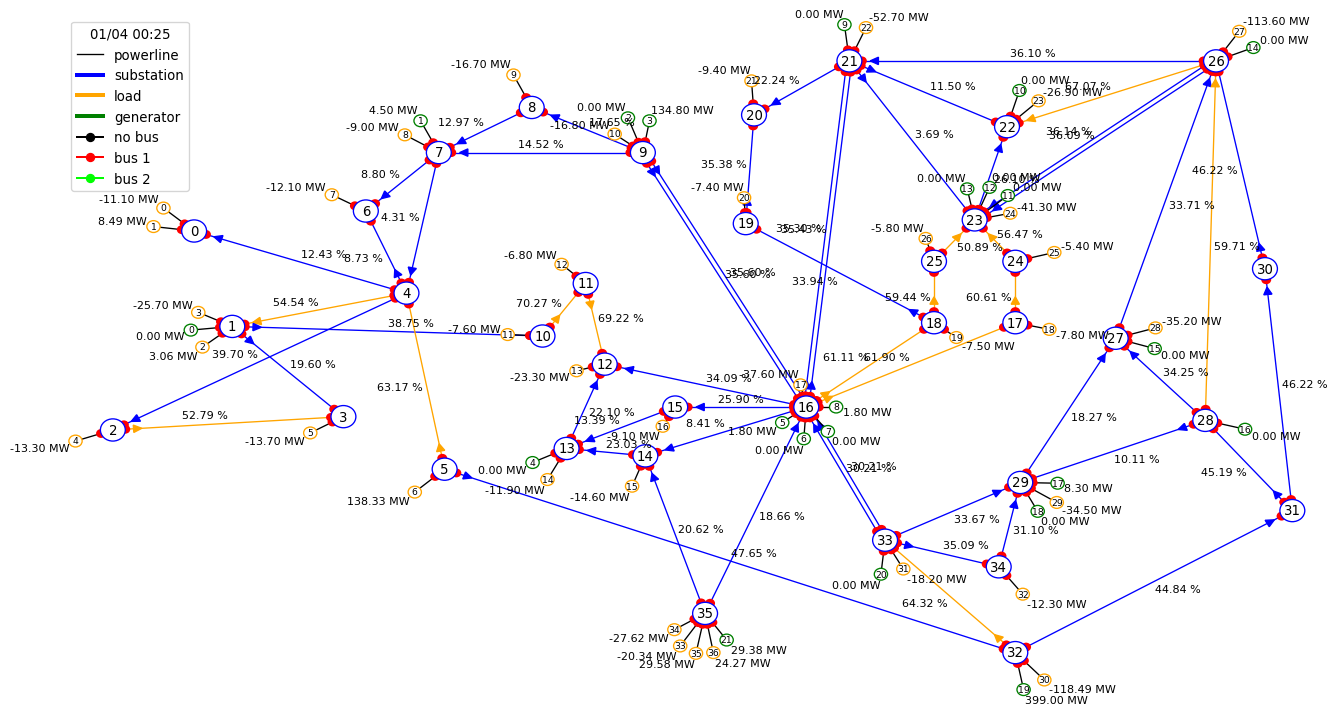

In [20]:
env, obs, obs_as_vect = sim(agent_action, t_action=4)
fig = plot_helper.plot_obs(obs)

<div class="alert alert-warning">
    Note: About the powerlines : A powergrid can be modeled as an oriented graph. Powerline have an "origin" and an "extremity". This means that when there is a positive flow in the line, the actual powerflow goes from its origin to its extremity. If the powerflow is negative, it means that it goes from its extremity to its origin.
    <br>
    Due to losses, one will notice that the powerflows entering the powerlines are not equal to the powerflows leaving the powerlines at their other ends. This is because some power is "lost" during the transportation. Around 2% of the energy generated is typically lost in the powergrid before it reaches the consumers.
</div>

<h4 style="font-family:'Verdana',sans-serif; color:#1D7874;">How to interpret the graph?</h4>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
The powerlines are plotted in different colors depending on the power flowing through them. The more power there is, the more orange / red the powerline will be.
Sometimes, most of the powerlines can be loaded at over 90% of their capacities, meaning that the situation is quite tense.
</p>

<a class="anchor" id="line_disconnection"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">F. A line disconnection and its effect</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    Transmission lines link different states or regions of the graph so that producers and consumers are connected. They cover long distances and can sometimes suddenly disconnect because of thunderstorms. It is natural to often have one or more lines that are out of service because thunder has hit a line. This number tends to increase during winter.
<br><br>
    A disconnected line changes the configuration of the grid and causes a redistribution of the powerflows in the grid. Sometimes these undesired events lead to some overloads in other lines. This is because when a line gets disconnected, the same amount of energy is still demanded by the customers, but the energy that was flowing in the powerline that has been disconnected has to go through other powerlines instead. These lines can then overload if the power that was flowing through them was already close to their capacity (thermal limit).
<br><br>
    Substations are equipped with switches to disconnect a line when a mistake or a congestion is detected (as explained in the first section of this notebook). As said, the standard criterion to disconnect a powerline is when its power has remained above a certain threshold for a given duration.
<br><br>
    This behavior occurs many times in electrical systems and the expertise and vast knowledge of operators helps alleviate the stress in order to guarantee energy to customers. These actions can be modeled using the grid2op package.
    <br><br>
    Here, we simulate a disconnection in our small grid and observe the subsequent state of the grid.
    In the few next cells we will explain how to disconnect powerlines. First, we create the action that will tell the grid to disconnect a powerline. Then we apply it on the grid and look at the result.
</p>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
Feel free to experiment and modify the action in the cell below to see what happens if you want to.
</p>

In [21]:
# Specify the disconnection of line with id 2 (it's python, so id starts at 0)
id_line = 2
# Initialize action class
action = action_space({"set_line_status": [(id_line, -1)]})
print(action)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force disconnection of 1 powerlines ([2])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration


/home/efimovin/anaconda3/lib/python3.6/site-packages/grid2op/MakeEnv/Make.py:264: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


Initial state of the grid:


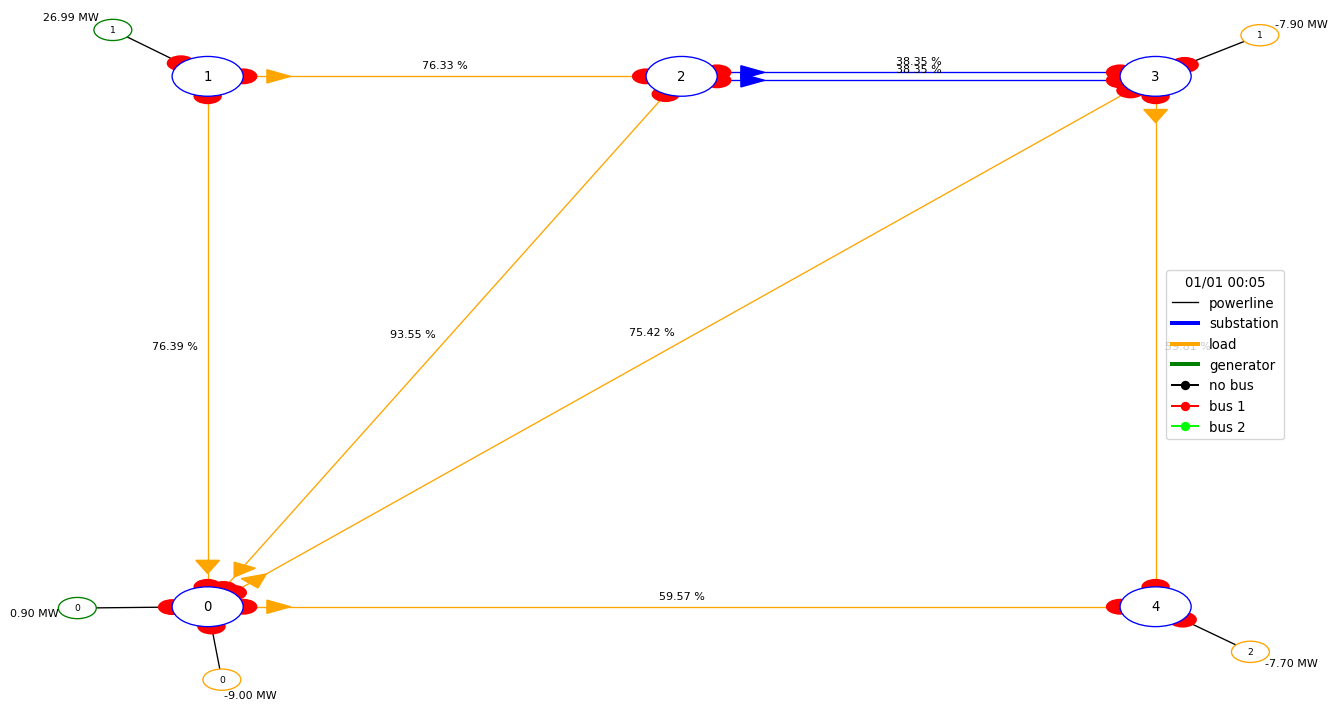

In [13]:
# Initialize the environment
env = make("rte_case5_example", test=True)

init_obs = env.reset()
print('Initial state of the grid:')
fig = plot_helper.plot_obs(init_obs)

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
Let's disconnect a line and observe the new state of the grid :
</p>

Grid State after disconnection of powerline with id 2:


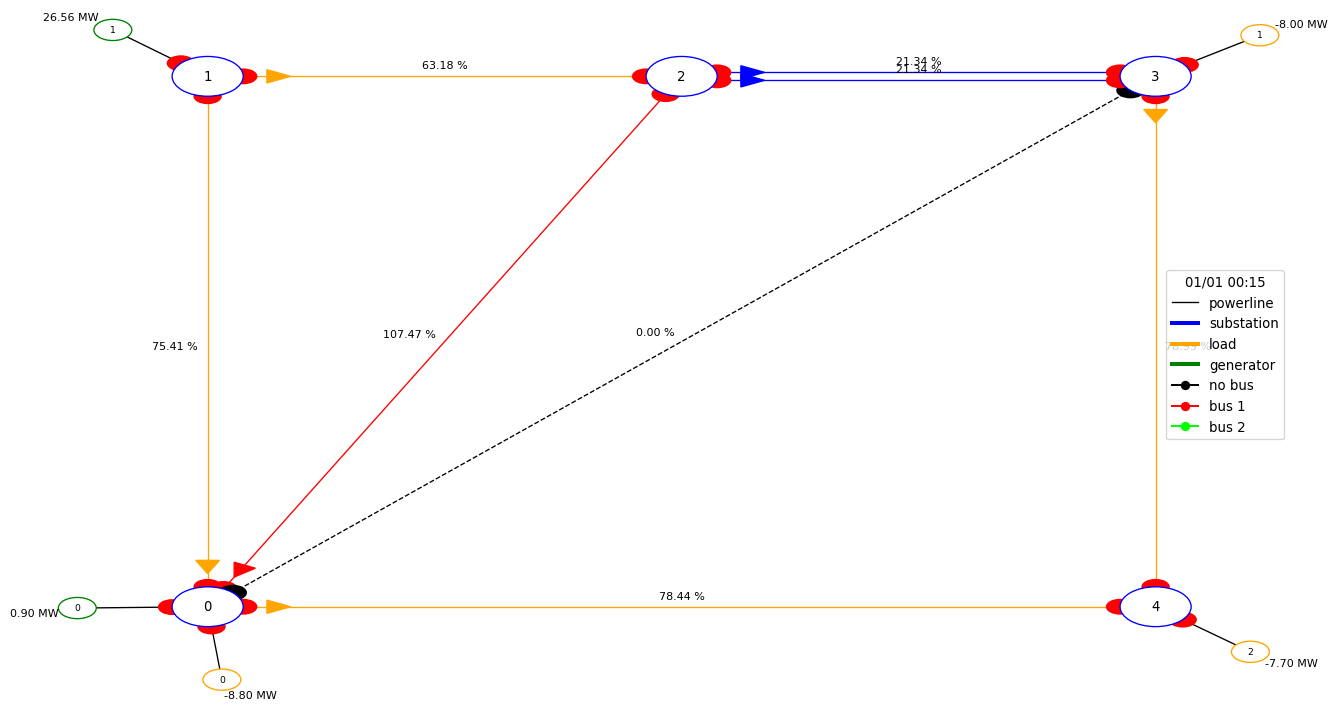

In [14]:
obs, reward, done, info = env.step(action)
obs, reward, done, info = env.step(action)
print("Grid State after disconnection of powerline with id 2:")
fig = plot_helper.plot_obs(obs)

<h4 style="font-family:'Verdana',sans-serif; color:#1D7874;">Looking at the plots</h4>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
We asked to disconnect the powerline 2 (as we said, this could happen randomly because of a storm). You may notice that the color of some lines has changed. The powerline 2 is indeed disconnected, and as a result, the powerload on the other powerlines increased because the power had to be redistributed. We can even see that a powerline is overloaded : the flow running through it exceeds its thermal limit. In such conditions, electrical operators have a few minutes to execute remedial actions to alleviate the system.
    <br>
    Let's look at the differences in the powerflows at the origins of the powerlines :
</p>

In [15]:
print("The differences in the powerflows at the origins of the powerlines is:\n{}".format(obs.a_or - init_obs.a_or))

The differences in the powerflows at the origins of the powerlines is:
[  -5.881531   30.639526 -120.674866   30.197838  -78.88858   -51.051277
  -51.051277   30.69339 ]


<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    In this case, disconnecting the powerline 2 has reduced the flow in the powerline 0 by 8.6 amperes, but has increased the powerflow in the powerline 1 by 29 amperes.
    <br><br>
    We can also have a look at the "current flows / thermal limit" ratio, which we call the "rho" ratio, and compare it to its previous value for each powerline.
    </p>

In [16]:
print("This is the previous rho ratio:\n{}".format(init_obs.rho))
print("This is the new rho ratio:\n{}".format(obs.rho))

This is the previous rho ratio:
[0.7638554  0.9354637  0.7542179  0.5957051  0.7632714  0.38354164
 0.38354164 0.5980672 ]
This is the new rho ratio:
[0.7540528  1.0747343  0.         0.7844416  0.6317904  0.21337071
 0.21337071 0.7899009 ]


The rho ratio for the powerline 2 decreased from 0.75 to 0, since it was disconnected. The ratios of some of the other powerlines have increased to compensate for that change, but some other powerlines are also less loaded.

<a class="anchor" id="sub_change"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">G. Changing the topology: reconfiguring a substation</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    A power grid is composed of several substations and generators, loads and powerlines that are connected to the substations. There are different ways for a connection between a substation and an object (generator, load or end of a powerline) to be established. There are many predefined configurations and each of them can be more reliable than others depending on the situation.
<br><br>
    In grid2op, substations have a "double busbar layout". <b>This means that each connection between a substation and an object (generator, load or end of a powerline) can be made on the first bus, or the second bus</b>, or not at all if there is a disconnection. The following figure is a representation of such configuration.
<br><br>
    <img src="utils/img/bus_bar.png", width=800, ALIGN="middle">
<br><br>
     <b> On the left</b> you can see the modeling of the substation 1 of the powergrid. It is composed of 2 busbars, named "bus 1" (blue) and "bus 2" (orange). Each object (in this case: consumption c1, production p1, and origin of powerline l1, origin of powerline l2, origin of powerline l3 and origin of powerline l4 and origin of powerline l5) can be connected either to bus 1 or to bus 2. In this example, l1, l2 and c1 are connected to bus 1 and p1, l3 and l4 are connected to bus 2. There is no connection between these two busbars ("bus_1" and "bus_2). <b> On the right </b> is the representation as a graph of the same powergrid.
    <br><br>
    For that reason, in grid2op, you are required to specify on which bus (1 or 2) to connect the object when you want a connection to be made.
</p>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    When an overload is detected, operators have to execute a remedial action to alleviate the stress in the system. Normally the years of experience of people who work in electrical control rooms is a crucial factor to determine the best one. 
<br><br>
    Transmission networks are a bit complex and include many paths where the power can flow (mesh grids). This also gives many alternatives to solve congestions. In many countries, modifying the production is a valid solution. For instance, you can decrease the production of the generators which are connected to the overloaded line and increase the production of other generators that are near the consumptions and it will reduce the overload in the powergrid.
<br><br>
    However, that solution is costly, especially in countries where producers are market players. A solution that is always cheap is to modify the main grid configuration, so that we do not have to change the productions of the generators. These are the kind of actions that Rte wants to use in order to build new, smarter controllers for operating powergrids at a lower cost.
<br><br>
    To illustrate this issue, let's take a step back to the previous grid state. Let's imagine that for some reason, the powerline 2 (connecting subsation 0 with substation 3) got disconnected on the powergrid, as we simulated previously (see the previous plot that we made after we disconnected the powerline 2). As we can see, this powergrid is not safe at all. The current flow in the powerline 1 (connecting substation 0 and substation 2) is over its thermal limit, it is overloaded. Something has to be done !
<br><br>
    In this section we will see if performing a node splitting of the substation 2 will solve the problem. This suggested action means going from the grid represented on the left, to the grid represented on the right in the figure below, where the bus 1 and 2 are represented by the light blue and orange dots respectively :
    <img src="utils/img/grid_2nodes.png", width=800, ALIGN="middle">
</p>

In [17]:
# find the id of powerline l2 in substation 2:
# get the ids of the lines from substations 0 to 2 (that is, only l2)
id_l2 = env.observation_space.get_lines_id(from_=0, to_=2)[0]
# then get the id of powerline l2 in substation 2:
id_l2_in_sub2 = env.backend.line_ex_to_sub_pos[id_l2]

# find the id of powerline l7 in substation 2:
# get the ids of the lines from substations 2 to 3 (that is, l6 and l7) and take the last one (which is l7)
id_l7 = env.observation_space.get_lines_id(from_=2, to_=3)[-1]
# then get the id of powerline l7 in substation 2:
id_l7_in_sub2 = env.backend.line_or_to_sub_pos[id_l7]

In [18]:
# build the vector containing False everywhere where we want to modify the bus (on powerlines l2 and l7)
modify_bus = np.full(shape=4, dtype=bool, fill_value=False)
modify_bus[id_l2_in_sub2] = True
modify_bus[id_l7_in_sub2] = True

# send that vector along with the id of the substation to specify the action that we want to perform
applied_action = env.action_space({"change_bus": {"substations_id": [(2, modify_bus)]}})
print(applied_action)

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT force any line status
	 - NOT switch any line status
	 - Change the bus of the following element:
	 	 - switch bus of line (extremity) 1 [on substation 2]
	 	 - switch bus of line (origin) 6 [on substation 2]
	 - NOT force any particular bus configuration


Grid State after the proposed topological action:


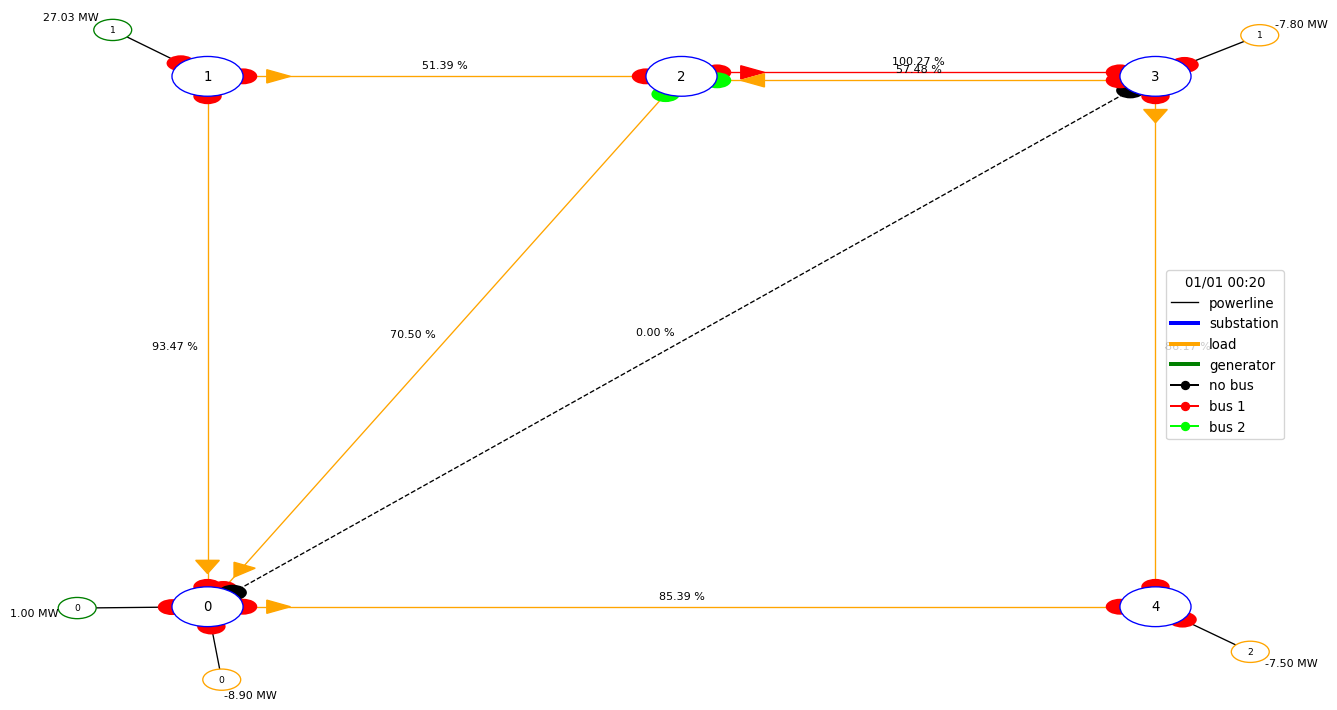

In [19]:
# Run the environment.
after_obs, reward, done, info = env.step(applied_action)

# Plot the grid.
if not done:
    print("Grid State after the proposed topological action:")
    fig = plot_helper.plot_obs(after_obs)
else:
    print("Unfortunately the solution caused a lot of trouble, no powerflow can be computed by the solver."
          "This is a GAME OVER")

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    The proposed solution almost solved the problem (the powerline 1 is not overloaded anymore) but it has created a problem (much smaller) on a second powerline, the powerline connecting substations 2 to 3, here on top.
    Fortunately for us, this problem is really small (flow of 100.27% instead of 100%). And we noticed that the loads are decreasing. In this case, it seems that doing nothing might solve this. Let's try out.
</p>

Grid State after the proposed topological action:


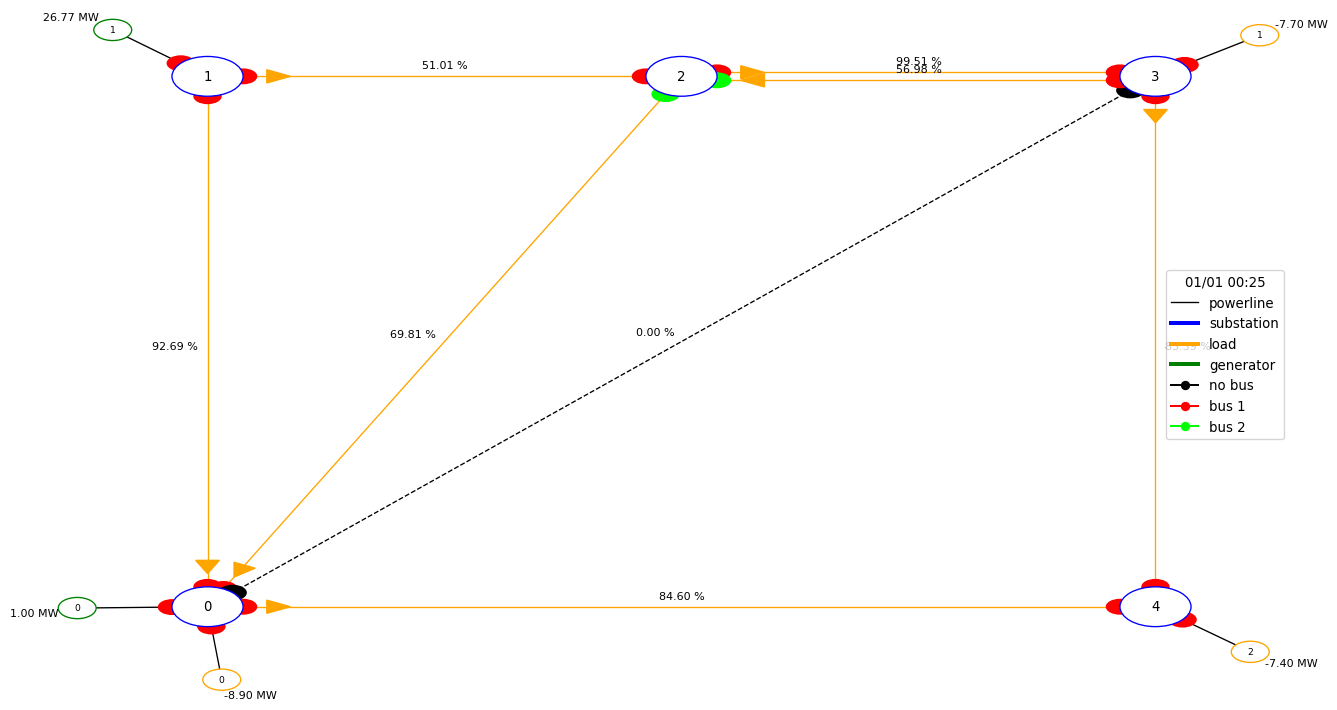

In [20]:
# Run the environment.
after_obs, reward, done, info = env.step(env.action_space())

# Plot the grid.
if not done:
    print("Grid State after the proposed topological action:")
    fig = plot_helper.plot_obs(after_obs)
else:
    print("Unfortunately the solution caused a lot of trouble, no powerflow can be computed by the solver."
          "This is a GAME OVER")

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    Yes ! It solves the problem without creating a new one :-)
</p>

<a class="anchor" id="conclusion"></a>
<h3 style="font-family:'Verdana',sans-serif; color:#1D7874;">H. Conclusion</h3>

<p style="font-family:'Verdana','sans-serif'; color:#393D3F; text-align:justify; font-size:14px;">
    In this notebook, we reviewed very quickly the main principles of operating transmission networks with a small grid. The continuity of the electric power service is crucial for the current economy and should be robust enough so that hazards or exceptional situations do not stop it from delivering electricity. An undesired line disconnection, if not followed by an action that could solve the problem, might cause blackouts and economic losses. 
<br><br>
    As we mentioned earlier, transmission grids operation involves many tasks but all of them are designed to reach one single objective: to supply reliable and secure electricity. Operators work every day to minimize the impact of external factors that put the electrical system at risk, but eventually when the grid is large and meshed, the daily operation is more complicated.
<br><br>
    The Grid2Op platform was designed to interact with reinforcement learning approaches. It allows executing actions in the transmission grid, to manage congestions or attempt to solve any problem that might occur, and is able to compute and return the resulting state of the environment. We covered actions such as line disconnections and nodes splitting, but there are many other complex combinations of those that a user could try.
<br><br>
    The goal for this challenge is to train an agent that will be able to learn a policy that could overcome obstacles, such as congestions, while optimizing the overall cost. It should be crucial that the agent learns a notion of robustness so that the electricity can be delivered reliably and securely, while getting closer to the operational constraints of the grid to make the task of operating the grid less expensive.
</p>

In [ ]:
env.render()

In [24]:
! pip install gym

Processing /home/efimovin/.cache/pip/wheels/be/a1/84/6b4caa6c1cea703acbfea8a24cc3c1729bd359cd4a65755d8b/gym-0.17.2-py3-none-any.whl
  Using cached pyglet-1.5.0-py2.py3-none-any.whl (1.0 MB)
  Using cached cloudpickle-1.3.0-py2.py3-none-any.whl (26 kB)
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 0.4.0
    Uninstalling cloudpickle-0.4.0:
      Successfully uninstalled cloudpickle-0.4.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

l2rpn-baselines 0.5.0 requires Keras>=2.3.1, which is not installed.
l2rpn-baselines 0.5.0 requires tensorflow>=2.2.0, which is not installed.
l2rpn-baselines 0.5.0 requires scikit-learn>=0.22.2.post1, but you'll have scikit-learn 0.19.1 which is incompatible.
l2rpn-baselines 0.5.

In [4]:
from gym.wrappers import AtariPreprocessing, Monitor
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
from my_baseline import make_agent
import pathlib
pathic = pathlib.Path().absolute()
env = Monitor(grid2op.make("l2rpn_neurips_2020_track1_small", backend=backend,
                   reward_class=L2RPNReward), directory='/home/efimovin/L2RPN', force=True)
agent = make_agent(env, f'{pathic}')

/home/efimovin/anaconda3/lib/python3.6/site-packages/gym/logger.py:30: UserWarning: WARN: Trying to monitor an environment which has no 'spec' set. This usually means you did not create it via 'gym.make', and is recommended only for advanced users.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


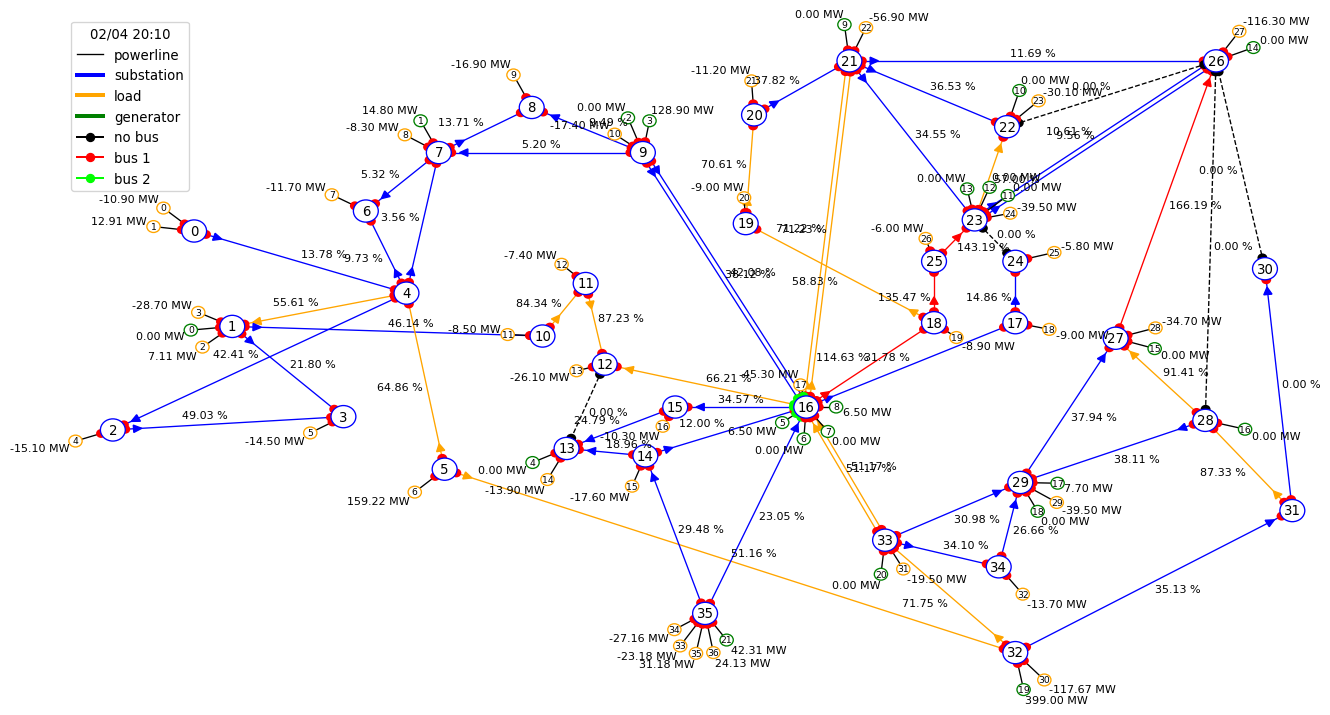

In [16]:
# record sessions
try:
    for _ in range(1):
        obs= env.reset()
        reward = 0
        done = False
        while not done:
            action = agent.act(obs, reward) #env.action_space.sample() #
            new_obs, reward, done, _ = env.step(action)
            obs =  new_obs 
            env.render(mode='human')
except Exception as e:
    raise
    print(e)
env.close()

In [ ]:
# Call evaluation interface
evaluate(env,
         name='FirstDQLN',
         load_path=f'{pathic}',
         logs_path='/home/efimovin/L2RPN',
         nb_episode=30,
         nb_process=1,
         max_steps=-1,
         verbose=False,
         save_gif=True)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Creating Scenario_april_000.gif


/home/efimovin/anaconda3/lib/python3.6/site-packages/grid2op/Episode/EpisodeReplay.py:174: UserWarning: Failed to optimize .GIF size, but gif is still saved:
Install dependencies to reduce size by ~3 folds
apt-get install gifsicle && pip3 install pygifsicle
  warnings.warn(warn_msg)


Wrote /home/efimovin/L2RPN/Scenario_april_000/Scenario_april_000.gif
Creating Scenario_april_001.gif
Wrote /home/efimovin/L2RPN/Scenario_april_001/Scenario_april_001.gif
Creating Scenario_april_002.gif
Wrote /home/efimovin/L2RPN/Scenario_april_002/Scenario_april_002.gif
Creating Scenario_april_003.gif
